In [1]:
#Importamos los paquetes relevantes
import pandas as pd # manipular DF's
import requests # HTTP requestor
from bs4 import BeautifulSoup # HTML parser
print("hola") # Pruebo que el kernel esté funcionando

hola


In [3]:
# Presentamos las URLs y su contenido HTML
# urlarg = INSERTAR LINK
urlext = "https://www.lanacion.com.ar/economia/" #URL Nacional

In [4]:
#Código para imprimir el HTML
def imprimirHTML(link):
    rext = requests.get(link)
    contenido_ext = rext.content
    soupext = BeautifulSoup(contenido_ext,"html.parser")
    print(soupext)

In [5]:
# imprimirHTML("https://www.lanacion.com.ar/economia/") # Si bien definí el link más arriba con la variable 'urlext', defino una función para probar varios links más rápido

In [6]:
# Mejoro la función creada para que reporte error de acceso si es que existe:
def imprimirHTML(link):
    try:
        response = requests.get(link)
        response.raise_for_status()  # Lanza error si hay problema HTTP
        contenido = response.content
        soup = BeautifulSoup(contenido, "html.parser")
        print(soup)
    except requests.exceptions.RequestException as e:
        print(f"Error al acceder a {link}: {e}")

# imprimirHTML("https://www.lanacion.com.ar/economia/")

In [7]:
imprimirHTML("https://www.lanacion.com.ar/economia/") # Imprimo La Nación Economía

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Noticias de Economía - LA NACION</title><script id="pageview" type="application/ld+json">{
  "pagetype": "acumulado",
  "metarefresh": "N/A"
}</script><script defer="" id="scriptRegisterPageview" src="/pf/resources/js/LN/scriptPageview.min.js?d=1883" type="text/javascript"></script><style id="critical-fonts">
@font-face {font-family:'Prumo';src:url('/pf/resources/fonts/prumo/Prumo-LNVF.woff2?d=1883') format('woff2-variations'); font-weight: 90; font-display: swap;}
@font-face {font-family:'Prumo Italic';src:url('/pf/resources/fonts/prumo/Prumo-ItalicLNVF.woff2?d=1883') format('woff2-variations'); font-weight: 90; font-display: swap;}
</style><style id="critical-css">.--prumo{font-family:Prumo,georgia,serif}.--font-primary{font-family:Prumo,georgia,serif}

In [15]:
# 1. Copio el HTML completo desde el print en un un bloc de notas y lo guardo como .html
# 2. Coloco el archivo .html en la misma carpeta donde esta el proyecto en formato .ipynb
# 2. Leo el HTML desde este notebook

with open("lanacion_economia.html", "r", encoding="utf-8") as f:
    html_doc = f.read()

print(html_doc[:500])  # muestra solo los primeros 500 caracteres

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Noticias de Economía - LA NACION</title><script id="pageview" type="application/ld+json">{
  "pagetype": "acumulado",
  "metarefresh": "N/A"
}</script><script defer="" id="scriptRegisterPageview" src="/pf/resources/js/LN/scriptPageview.min.js?d=1883" type="text/ja


In [16]:
# Pruebo manualmente el primer H2 de la web:

In [17]:
### Titulo H2: "Se mezclaron la suerte y la oportunidad". La argentina que transformó su hobby en un fenómeno mundial

In [18]:
# 1. Leer el HTML desde tu archivo
with open("lanacion_economia.html", "r", encoding="utf-8") as f:
    contenido = f.read()

# 2. Crear el objeto BeautifulSoup
soup = BeautifulSoup(contenido, "html.parser")

# 3. Buscar todos los elementos <h2>
h2_elements = soup.find_all("h2")

# 4. Mostrar el resultado
print("\n", h2_elements)


 [<h2 class="dolar-title --fourxs">Dólar oficial</h2>, <h2 class="dolar-title --fourxs">Dólar blue</h2>, <h2 class="dolar-title --fourxs">Dólar tarjeta</h2>, <h2 class="dolar-title --fourxs">Dólar turista</h2>, <h2 class="dolar-title --fourxs">Dólar MEP</h2>, <h2 class="dolar-title --fourxs">Dólar mayorista</h2>, <h2 class="dolar-title --fourxs">Euro</h2>, <h2 class="com-title --font-primary --threexl --font-extra"><a class="com-link" href="/economia/negocios/la-argentina-que-transformo-su-hobby-en-un-fenomeno-mundial-nid05092025/" title='"Se mezclaron la suerte y la oportunidad". La argentina que transformó su hobby en un fenómeno mundial'><span class="com-lead">"Se mezclaron la suerte y la oportunidad". </span>La argentina que transformó su hobby en un fenómeno mundial</a></h2>, <h2 class="com-title --font-primary --l --font-medium"><a class="com-link" href="/economia/se-define-todo-la-incertidumbre-domino-en-un-encuentro-de-ejecutivos-que-se-mostraron-preocupados-nid04092025/" titl

In [19]:
titulos = []
links = []

for h2 in h2_elements:
    h2_text = h2.text.strip()
    a_tag = h2.find("a")
    if a_tag:
        h2_link = a_tag.get('href')
    else:
        h2_link = None
    titulos.append(h2_text)
    links.append(h2_link)

dfext = pd.DataFrame({"Titulo": titulos, "Link": links})
dfext

,Titulo,Link
0,Dólar oficial,None
1,Dólar blue,None
2,Dólar tarjeta,None
3,Dólar turista,None
4,Dólar MEP,None
5,Dólar mayorista,None
6,Euro,None
7,"""Se mezclaron la suerte y la oportunidad"". La ...",/economia/negocios/la-argentina-que-transformo...
8,“Se define todo”. La incertidumbre dominó en u...,/economia/se-define-todo-la-incertidumbre-domi...
9,Convención de ejecutivos. Bullrich pidió “comp...,/economia/bullrich-pidio-compromiso-de-todo-el...


In [20]:
dfext['Link'].to_list() # Sin el Método to_list(), el notebook imprime sólo una parte de los links, y de esa forma no funcionan

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 '/economia/negocios/la-argentina-que-transformo-su-hobby-en-un-fenomeno-mundial-nid05092025/',
 '/economia/se-define-todo-la-incertidumbre-domino-en-un-encuentro-de-ejecutivos-que-se-mostraron-preocupados-nid04092025/',
 '/economia/bullrich-pidio-compromiso-de-todo-el-pais-para-bajar-el-gasto-publico-y-los-impuestos-nid04092025/',
 '/economia/una-eleccion-a-todo-o-nada-por-obra-del-propio-gobierno-nid04092025/',
 '/economia/en-medio-de-la-turbulencia-cambiaria-el-gobierno-ratifico-el-esquema-de-bandas-nid04092025/',
 '/economia/riesgo-electoral-que-dijo-el-vicepresidente-del-bcra-sobre-la-suba-de-tasas-las-reservas-y-el-dolar-nid04092025/',
 '/economia/la-inflacion-habria-superado-el-2-en-agosto-pero-el-ano-cerraria-con-el-menor-ipc-desde-2017-nid04092025/',
 '/economia/rafael-grossi-los-politicos-y-ejecutivos-de-finanzas-deben-ver-que-el-orden-internacional-nid04092025/',
 '/economia/el-tesoro-vende-cada-vez-mas-para-contener-al-dolar-

In [21]:
### Con esto finalizamos el trabajo con los Dataframes de noticias nacionales del portal La Nación - Economia

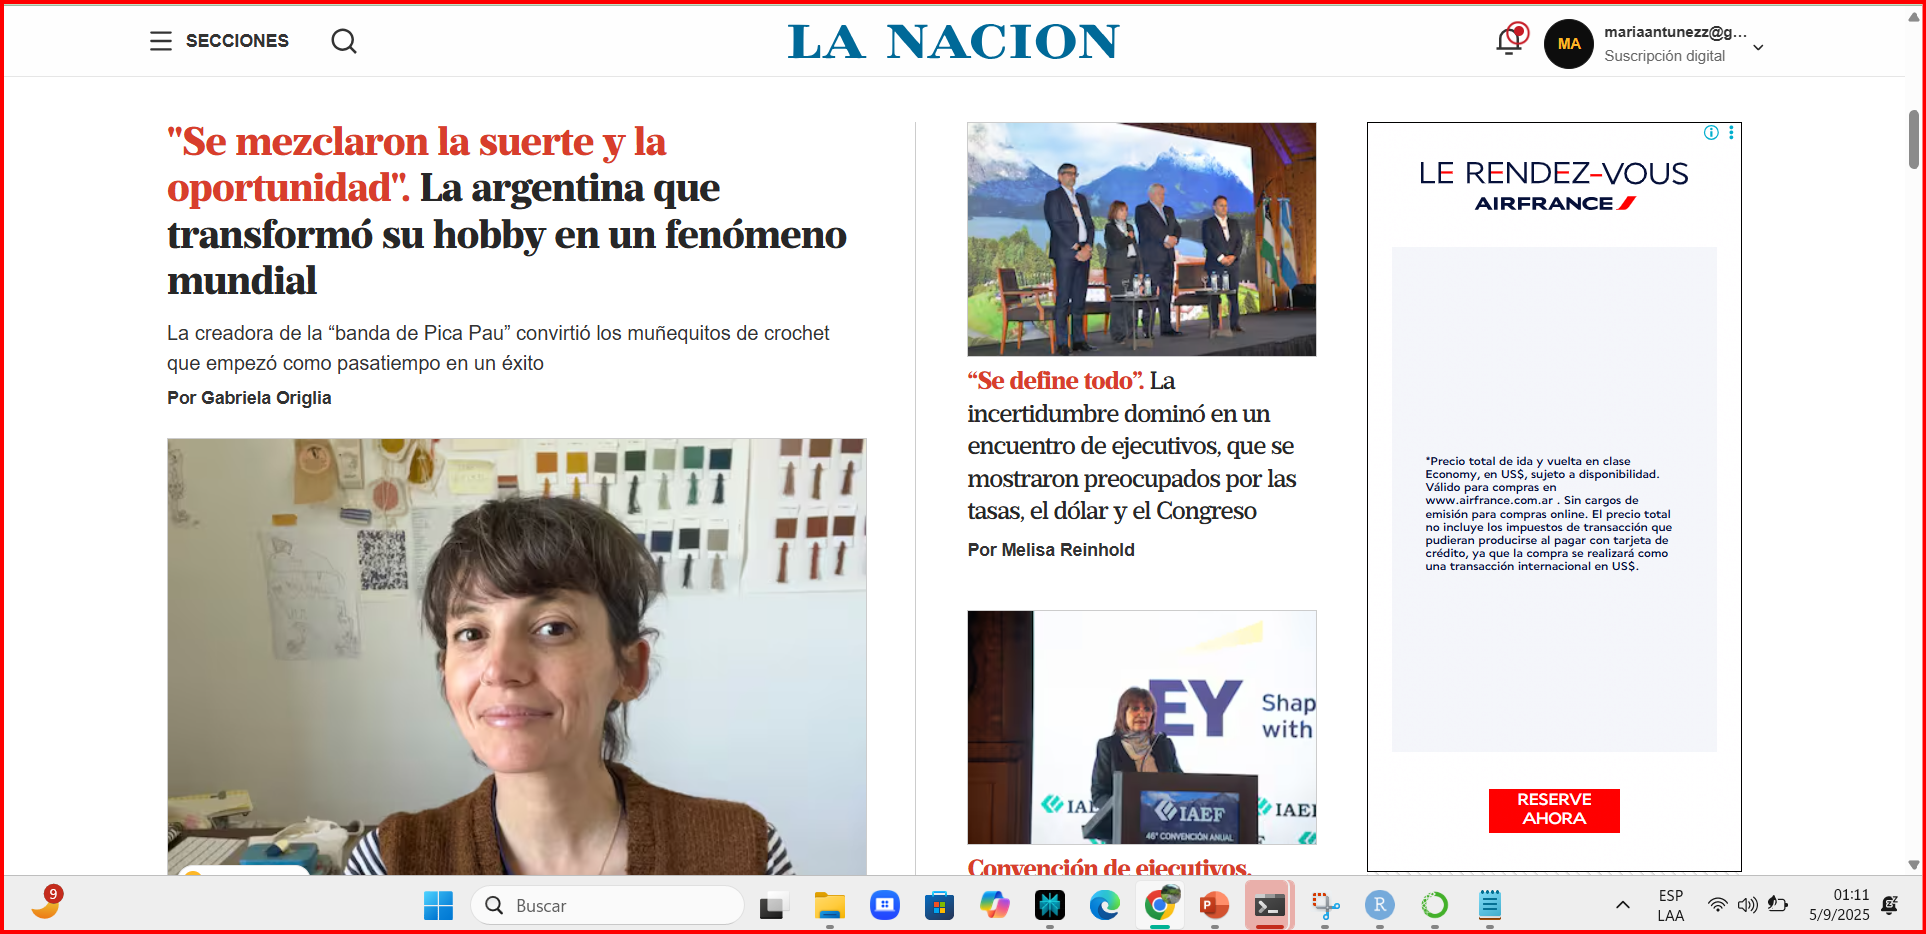

In [27]:
# Captura del diario argentino:


from IPython.display import Image, display
display(Image("Captura de pantalla 2025-09-05 011130.png", width=400))
